# Logistic Regression using Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

## Import Data Set

In [2]:
train_data = pd.read_csv('micro_data_train.csv')

In [3]:
train_data.head()

,micro_test_1,micro_test_2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
micro_test_1    118 non-null float64
micro_test_2    118 non-null float64
accepted        118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [5]:
train_data.describe()

,micro_test_1,micro_test_2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [6]:
test_data = pd.read_csv('micro_data_test.csv')
test_data.head()

,micro_test_1,micro_test_2
0,0.051267,0.69956


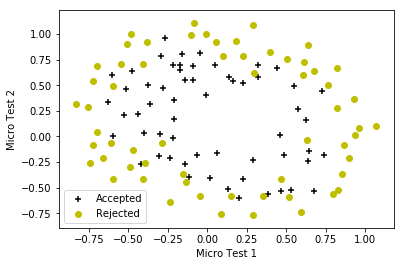

In [7]:
train_data_0 = train_data[train_data.accepted == 0]
train_data_1 = train_data[train_data.accepted == 1]
plt.scatter(train_data_1.iloc[:, 0], train_data_1.iloc[:, 1], marker='+', color='black')
plt.scatter(train_data_0.iloc[:, 0], train_data_0.iloc[:, 1], marker='o', color='y')
plt.xlabel('Micro Test 1')
plt.ylabel('Micro Test 2')
plt.legend(labels=['Accepted', 'Rejected'])
plt.show()

## Feature Separation and Normalization

In [8]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
m = y_train.shape[0]

In [9]:
X_test = test_data.iloc[:, :].values

In [10]:
poly = PolynomialFeatures(6)
X_train_mapped = poly.fit_transform(X_train[:, 0:2])
X_test_mapped = poly.fit_transform(X_test)

## Gradient Descent

In [11]:
def sigmoid(input_var):
    sigmoid_result = 1 / (1 + np.exp(-input_var))
    return sigmoid_result

In [12]:
def safe_ln(x, minval=0.0000000001):
    return np.log(x.clip(min=minval))

In [13]:
def compute_cost_reg(theta, X, y):
    z = np.dot(X, theta)
    hx = sigmoid(z)
    neg_0_cost = (-1 * (1 - y)) * safe_ln((1 - hx))
    pos_1_cost = (-1 * y) * np.log(hx)
    cost_normal = (pos_1_cost + neg_0_cost) / m
    cost_reg = (lambda_value / (2 * m)) * np.sum(np.power(theta[1:], 2))
    cost_normal_sum = np.sum(cost_normal)
    cost = cost_normal_sum + cost_reg
    return cost.flatten()

In [14]:
def gradient_reg(theta, X, y):
    z = np.dot(X, theta)
    hx = sigmoid(z)
    error_value = hx - y
    error_value_final = np.matmul(error_value.T, X)
    delta = error_value_final / m
    delta_reg = (lambda_value / m) * theta.reshape(-1, 1).T
    delta_reg[0] = 0
    delta_total = np.multiply((delta + delta_reg), (alpha / m))
    grad = delta_total.flatten()
    return grad.flatten()

In [15]:
def custom_optimizer(theta, X, y, iterations):
    iteration_array = np.array([itr for itr in range(iterations)])
    cost_history = []
    for i in range(iterations):
        theta = theta - gradient_reg(theta, X, y)
        cost_history.append(compute_cost_reg(theta, X, y))
    return [theta, np.column_stack((iteration_array, np.asarray(cost_history)))]

In [16]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')

## Tests with few lambda values

In [17]:
alpha = m
lambda_value = 1
theta_value = np.zeros(X_train_mapped.shape[1])
cost = compute_cost_reg(theta_value, X_train_mapped, y_train)
grad = gradient_reg(theta_value, X_train_mapped, y_train)

In [18]:
print("For lambda = 1 and theta = zeros")
print("Cost: " + str(cost))
print("Grad (First 5): " + str(grad[:5]))

For lambda = 1 and theta = zeros
Cost: [0.69314718]
Grad (First 5): [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [19]:
lambda_value = 10
theta_value = np.ones(X_train_mapped.shape[1])
cost = compute_cost_reg(theta_value, X_train_mapped, y_train)
grad = gradient_reg(theta_value, X_train_mapped, y_train)

In [20]:
print("For lambda = 10 and theta = ones")
print("Cost: " + str(cost))
print("Grad (First 5): " + str(grad[:5]))

For lambda = 10 and theta = ones
Cost: [3.16450933]
Grad (First 5): [0.34604507 0.07660616 0.11004999 0.14211702 0.00743991]


## Use Custom Optimizer

In [21]:
lambda_value = 1
theta_value = np.zeros(X_train_mapped.shape[1])
result_theta, cost_history = custom_optimizer(theta_value, X_train_mapped, y_train, 400)
print(result_theta)

[ 2.49156326e+00  1.71073751e+00  2.72504616e+00 -4.06317065e+00
 -2.69735125e+00 -3.23214529e+00  6.11392383e-01 -1.04964862e+00
 -9.06406994e-01 -2.30130458e-01 -3.14745816e+00 -1.14278626e-01
 -1.48761248e+00 -9.21463312e-01 -2.59813325e+00 -4.17304358e-01
 -5.58775468e-01  1.53901760e-03 -7.60994608e-01 -9.03268947e-01
 -7.02487860e-01 -2.35087708e+00  8.76805647e-02 -6.96248227e-01
  5.51171043e-02 -8.25159146e-01 -5.69326190e-01 -1.82575785e+00]


In [22]:
accuracy = 100 * sum(predict(result_theta, X_train_mapped) == y_train.ravel()) / y_train.size
print(accuracy)

83.05084745762711


## Cost Function

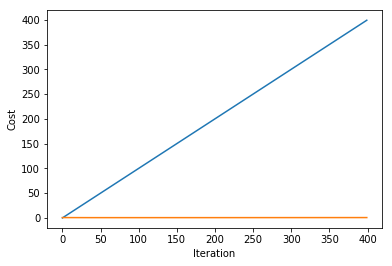

In [23]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()